# Diego Macieski ID_2024238

# Analysis of Global Bike Rental Data for Operational Insights

## Table of Contents

**[Introduction](#Introduction)**

**[Data Preparation](#Data-Preparation)**

[1. Exploring the Data](#1.-Exploring-the-Data)

[2. Data Preparation](#2.-Data-Preparation)

[3. Outlier Analysis](#3.-Outlier-Analysis)

[4. Encoding, Scaling, and Feature Engineering](#4.-Encoding,-Scaling,-and-Feature-Engineering)

[5. Dimensionality Reduction: LDA vs PCA](#5.-Dimensionality-Reduction:-LDA-vs-PCA)

**[Machine Learning - Supervised Classification Technique](#Machine-Learning---Supervised-Classification-Technique)**

[1. Selection of Machine Learning Approach](#1.-Selection-of-Machine-Learning-Approach)

[2. Logistic Regression ](#Logistic-Regression)

[3.Hyperparameter Tuning](#3.-Hyperparameter-Tuning)

[4. Comparison of Machine Learning Outcomes](#4.-Comparison-of-Machine-Learning-Outcomes)

[5.Evaluating Alternative Features: Testing with Bike Model](#5.-Evaluating-Alternative-Features:-Testing-with-Bike-Model)

**[Machine Learning - Supervised Regression Technique](#Machine-Learning---Supervised-Regression-Technique)**

[6. Selection of Machine Learning Approach](#6.-Selection-of-Machine-Learning-Approach)

[7. XGBoost ](#XGBoost)

[8.Hyperparameter Tuning](#8.Hyperparameter-Tuning)

[9. Comparison of Machine Learning Outcomes](#9.-Comparison-of-Machine-Learning-Outcomes)

**[Conclusion](#Conclusion)**

**[References](#References)**

In [524]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import plotly.express as px
import sklearn.preprocessing as preproc
import scipy.stats as stats

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings("ignore") 

In [525]:
df = pd.read_excel('/Users/diegomacieski/Library/Mobile Documents/com~apple~CloudDocs/GitHub/integrated-ca2-DiegoMacieski/biking_dataset.xlsx')

# Introduction  

In today's competitive market, data analysis plays a fundamental role in the business decision-making process. This work aims to explore a dataset provided by a global bicycle rental company, with operations in cities such as New York, London, Berlin, Chicago, San Francisco and Dublin.  

The dataset includes information such as city, weather conditions, rider age, bike model, trip duration, distance traveled, rider satisfaction, and bike rental cost. Through detailed analysis of this data, the aim is to identify patterns of customer behavior and bicycle usage in order to improve operational efficiency, increase customer satisfaction and optimize pricing strategies.  

Based on the results obtained, the company will be able to plan future actions and make data-based decisions to improve the management of its fleet, adjust prices and improve the customer experience. This work will be divided into two main parts: **Data Preparation** and **Machine Learning Modeling**, each contributing to achieving the proposed objectives in an effective and structured way.

The target variables of this CA will be:

**Rider Satisfaction** this is the target variable for **classification** tasks because it is a categorical variable ("Low", "Medium", "High") with the objective of predicting a category.

**Bike Rental Cost ($)** this is the target variable for **regression** tasks because it is a continuous variable (The total cost of the bike rental in USD) aiming to predict the cost of the rental

These two scenarios are considered supervised learning, but with different types of output: regression to predict continuous values and classification for categories. In supervised learning, the algorithm learns from a set of data labeled X (independent variable) and Y (dependent variable - target), where Y is either Rider Satisfaction or Bike Rental Cost, and X represents the remaining features. Unsupervised learning does not apply because this type of learning involves algorithms working with unlabeled data, attempting to identify patterns or structures on their own.

# Data Preparation

# 1. Exploring the Data

To understand the structure of the dataset, we begin by exploring basic characteristics using commands such as df.head(), df.shape, df.dtypes, and df.describe(), which provide insights into the dataset’s layout, types, and summary statistics.

In [526]:
df.head(5)

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12


In [527]:
df.shape

(900, 8)

In [528]:
df.dtypes

City                      object
Weather Condition         object
Rider Age                float64
Bike Model                object
Ride Duration (min)      float64
Distance Covered (km)    float64
Rider Satisfaction        object
Bike Rental Cost ($)     float64
dtype: object

In [529]:
df.describe()

,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($)
count,885.000000,887.000000,887.000000,891.000000
mean,39.264407,62.225479,20.130530,26.581470
std,12.373803,33.956434,11.178777,9.438224
min,18.000000,5.000000,0.510000,7.330000
25%,29.000000,32.000000,10.830000,19.210000
50%,39.000000,62.000000,19.990000,27.040000
75%,50.000000,92.000000,29.155000,33.955000
max,60.000000,120.000000,39.870000,48.380000


# 2. Data Preparation

Data preparation begins by identifying missing values in the DataFrame using the command `df.isnull().sum()`, which provides the count of null values for each column. To address the missing data, numerical columns are filled with their respective mean values using `df.fillna(df.mean())`. This ensures that the dataset remains complete and suitable for analysis. For categorical variables with missing values, the chosen approach was to remove the rows containing them. In total, 34 rows were removed, representing 3.77% of the dataset.

In [530]:
print(df.isnull().sum())

City                     10
Weather Condition        11
Rider Age                15
Bike Model               10
Ride Duration (min)      13
Distance Covered (km)    13
Rider Satisfaction       11
Bike Rental Cost ($)      9
dtype: int64


In [531]:
columns_to_fill = ['Bike Rental Cost ($)', 'Distance Covered (km)', 'Ride Duration (min)', 'Rider Age']

for column in columns_to_fill:
    df[column].fillna(df[column].mean(), inplace=True)

print(df.isnull().sum())

City                     10
Weather Condition        11
Rider Age                 0
Bike Model               10
Ride Duration (min)       0
Distance Covered (km)     0
Rider Satisfaction       11
Bike Rental Cost ($)      0
dtype: int64


In [532]:
categorical_columns = ['City', 'Weather Condition', 'Bike Model', 'Rider Satisfaction']

df = df.dropna(subset=categorical_columns)

print(df.isnull().sum())
df.shape

City                     0
Weather Condition        0
Rider Age                0
Bike Model               0
Ride Duration (min)      0
Distance Covered (km)    0
Rider Satisfaction       0
Bike Rental Cost ($)     0
dtype: int64


(866, 8)

# 3. Outlier Analysis

Methods for Analyzing Outliers  

The chosen methods for identifying outliers are as follows:  

- **Z-Score Method**: Flags data points that are a certain number of standard deviations away from the mean. Typically, values with \( |Z| > 3 \) are considered outliers.  
 

No outliers were found in the numerical variables

In [533]:
from scipy.stats import zscore

columns_to_check = ['Rider Age', 'Ride Duration (min)', 'Distance Covered (km)', 'Bike Rental Cost ($)']

for col in columns_to_check:
    z_scores = zscore(df[col].dropna()) 
    outliers = df[abs(z_scores) > 3]
    print(f"{col} has {len(outliers)} outliers using Z-score.")

Rider Age has 0 outliers using Z-score.
Ride Duration (min) has 0 outliers using Z-score.
Distance Covered (km) has 0 outliers using Z-score.
Bike Rental Cost ($) has 0 outliers using Z-score.


- **IQR Method**: Identifies outliers as values below \( Q1 - 1.5 X IQR \) or above \( Q3 + 1.5 X IQR ), where IQR is the interquartile range (\( Q3 - Q1 \)).  


In [534]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

columns_to_check = ['Rider Age', 'Ride Duration (min)', 'Distance Covered (km)', 'Bike Rental Cost ($)']

for col in columns_to_check:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col} has {len(outliers)} outliers.")

Rider Age has 0 outliers.
Ride Duration (min) has 0 outliers.
Distance Covered (km) has 0 outliers.
Bike Rental Cost ($) has 0 outliers.


- **Boxplot Visualization**: Highlights data points that fall outside the interquartile range using a graphical representation, making it easier to spot potential outliers visually. 

In [535]:
columns_to_plot = ["Bike Rental Cost ($)", "Distance Covered (km)", "Ride Duration (min)", "Rider Age"]

for column in columns_to_plot:
    boxplot = px.box(df, y=column, title=f"Boxplot of {column}")
    boxplot.show()

# 4. Encoding, Scaling, and Feature Engineering

Goal: Prepare variables for use in Machine Learning models.

## Encoding

Goal: Convert categorical data into a numerical format 

## Label Encoding

Assigns an integer to each category, useful for ordinal variables or with large numbers of categories.

Chosen variable = "City"

In [536]:
df["City"].unique()

array(['Berlin', 'San Francisco', 'New York', 'London', 'Chicago',
       'Dublin'], dtype=object)

In [537]:
le=preproc.LabelEncoder()

df["City"]=le.fit_transform(df["City"])

print("Encoded cities:")
print(df['City'].unique())

print("\nCities corresponding to numbers:")
for i in range(len(le.classes_)):
    print(f"{i}: {le.classes_[i]}")

Encoded cities:
[0 5 4 3 1 2]

Cities corresponding to numbers:
0: Berlin
1: Chicago
2: Dublin
3: London
4: New York
5: San Francisco


## One-Hot Encoding

Transforms nominal variables into binary columns, ideal for variables without a natural order.

Chosen variable = "Weather Condition"

In [538]:
df["Weather Condition"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [539]:
df = pd.get_dummies(df, columns=["Weather Condition"], dtype=int)

print("Correlation between 'Weather Condition' values and the One-Hot Encoded columns:")
print("Weather Condition_Cloudy= 1 0 0 0")
print("Weather Condition_Rainy = 0 1 0 0")
print("Weather Condition_Snowy = 0 0 1 0")
print("Weather Condition_Sunny = 0 0 0 1")

Correlation between 'Weather Condition' values and the One-Hot Encoded columns:
Weather Condition_Cloudy= 1 0 0 0
Weather Condition_Rainy = 0 1 0 0
Weather Condition_Snowy = 0 0 1 0
Weather Condition_Sunny = 0 0 0 1


## Ordinal Encoding

Similar to Label Encoding, but with an explicit interpretation that there is an order between categories.

Chosen variable = "Rider Satisfaction" and "Bike Model"

In [540]:
df["Rider Satisfaction"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [541]:
order = ['Low', 'Medium', 'High']

oe = OrdinalEncoder(categories=[order])

df["Rider Satisfaction"] = oe.fit_transform(df[["Rider Satisfaction"]])

df["Rider Satisfaction"] = df["Rider Satisfaction"].astype(int)

print("Relation between Rider Satisfaction categories and their encoded values:")
for i, category in enumerate(oe.categories_[0]):
    print(f"'{category}': {i}")

Relation between Rider Satisfaction categories and their encoded values:
'Low': 0
'Medium': 1
'High': 2


In [542]:
df["Bike Model"].unique()

array(['Standard', 'Electric', 'Mountain', 'Manual'], dtype=object)

In [543]:
order_bike_model = ['Standard', 'Manual', 'Mountain', 'Electric']

oe_bike_model = OrdinalEncoder(categories=[order_bike_model])

df["Bike Model"] = oe_bike_model.fit_transform(df[["Bike Model"]])

df["Bike Model"] = df["Bike Model"].astype(int)

print("Relation between Bike Model categories and their encoded values:")
for i, category in enumerate(oe_bike_model.categories_[0]):
    print(f"'{category}': {i}")
    

Relation between Bike Model categories and their encoded values:
'Standard': 0
'Manual': 1
'Mountain': 2
'Electric': 3


## Handling Class Imbalance 

Analysing the balance between the classes, the only one that had severe imbalance, where the minority class represents less than 1% of the data, was the 'Bike Model Manual': 1, and therefore it will be removed. The other variables will not be altered.

In [544]:
print(df['City'].value_counts())

City
3    183
0    165
4    164
1    164
5    162
2     28
Name: count, dtype: int64


In [545]:
weather_condition_counts = df[['Weather Condition_Cloudy', 'Weather Condition_Rainy', 'Weather Condition_Snowy', 'Weather Condition_Sunny']].sum()

print("Class distribution for One-Hot encoded 'Weather Condition':")
print(weather_condition_counts)

Class distribution for One-Hot encoded 'Weather Condition':
Weather Condition_Cloudy    197
Weather Condition_Rainy     243
Weather Condition_Snowy     213
Weather Condition_Sunny     213
dtype: int64


In [546]:
print(df['Rider Satisfaction'].value_counts())

Rider Satisfaction
2    311
1    290
0    265
Name: count, dtype: int64


In [547]:
print(df['Bike Model'].value_counts())

Bike Model
2    292
0    287
3    286
1      1
Name: count, dtype: int64


Class 1 removed Bike Model - Manual: 1

In [548]:
df = df[df['Bike Model'] != 1]

print(df['Bike Model'].value_counts())

Bike Model
2    292
0    287
3    286
Name: count, dtype: int64


## Feature Engineering

Goal: To create, modify, or select features to enhance the performance.

The target variable to be evaluated is **Rider Satisfaction**. As observed in the heatmap below, this variable does not show a strong correlation, either positive or negative, with the other variables in the dataset. This lack of correlation may hinder the model's performance during the project development. To address this challenge, **new features** will be created (feature engineering) to improve the data's representativeness and, consequently, the algorithm's performance.

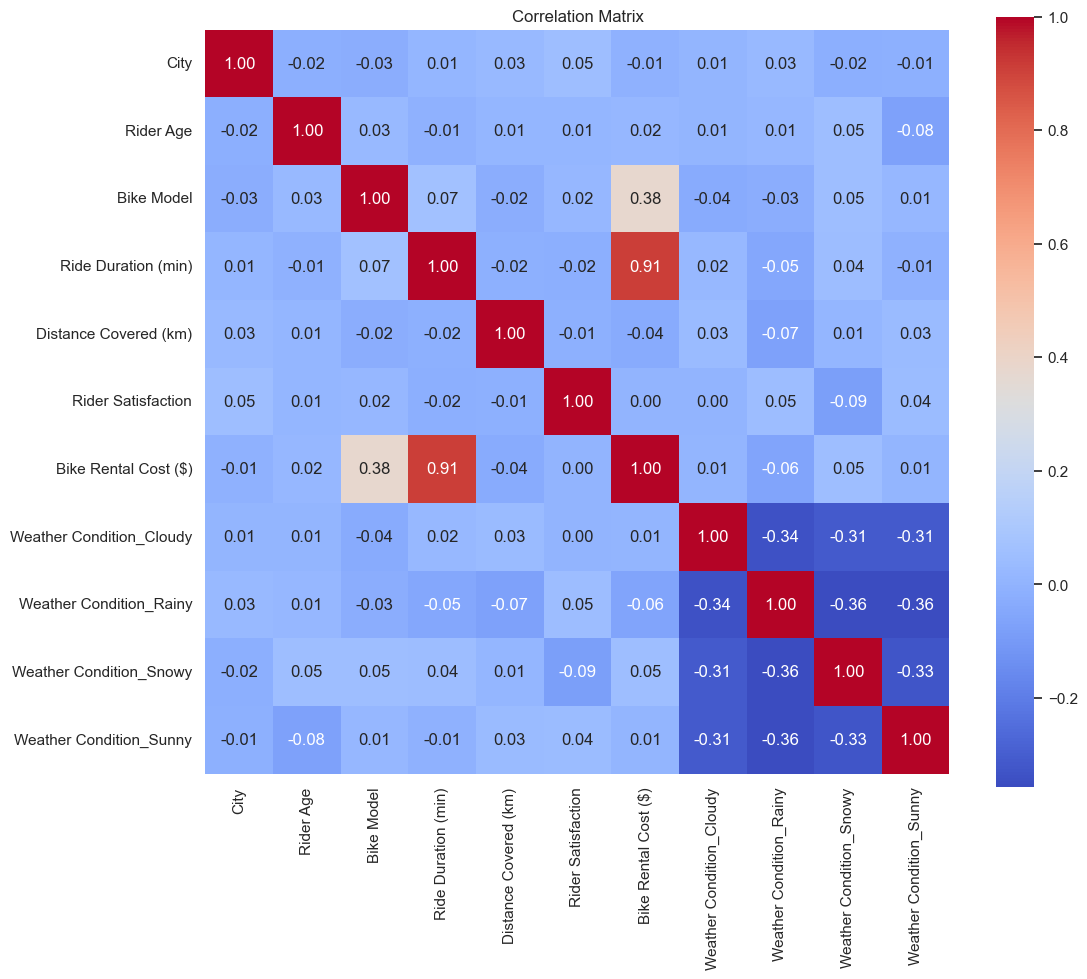

In [549]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix")
plt.show()

The chosen strategy for Feature Engineering will be to create new features and check if any have a strong correlation with the rider satisfaction variable, in order to improve the algorithm's performance. The created features are:

1.	Cost per Kilometer: Represents the cost per kilometer traveled. It is calculated by dividing the bike rental cost by the distance covered.

2.	Ride Duration x Cost/km: Represents the product of the ride duration (in minutes) and the cost per kilometer. This variable adjusts the cost according to the duration of the ride.

3.	Avg Speed (km/min): Represents the average speed of the ride, calculated by dividing the distance covered by the ride duration.

4.	Cost-Effectiveness: Measures the relationship between the bike rental cost and the distance covered. The lower the value, the more cost-effective the ride was in relation to the distance.

5.	Rider Age Group: Categorizes the rider’s age into age ranges. The ranges are 18-25, 26-35, 36-50, and 51-60, with each range assigned a numeric label from 0 to 3.

6.	Is Long Ride: Indicates whether the ride was long or not. If the ride lasted longer than 60 minutes, it is considered long (value 1); otherwise, it is considered short (value 0).

7.	Time Efficiency ($/min): Represents the efficiency of the time spent in relation to the cost. It measures how much it costs per minute of the ride.

8.	Adverse Weather: Indicates whether the ride took place under adverse weather conditions (rain or snow). If the ride occurred under these conditions, the variable is set to 1 (adverse conditions), otherwise, it is 0.

In [550]:
df['Cost per Kilometer'] = df['Bike Rental Cost ($)'] / df['Distance Covered (km)']

df['Ride Duration x Cost/km'] = df['Ride Duration (min)'] * df['Cost per Kilometer']

df['Avg Speed (km/min)'] = df['Distance Covered (km)'] / df['Ride Duration (min)']

df['Cost-Effectiveness'] = df['Bike Rental Cost ($)'] / df['Distance Covered (km)']

bins = [18, 26, 36, 51, 61] 
labels = [0, 1, 2, 3]  

df['Rider Age Group'] = pd.cut(df['Rider Age'], bins=bins, labels=labels, right=False)

df['Is Long Ride'] = np.where(df['Ride Duration (min)'] > 60, 1, 0)

df['Time Efficiency ($/min)'] = df['Bike Rental Cost ($)'] / df['Ride Duration (min)']

df['Adverse Weather'] = np.where(df[['Weather Condition_Rainy', 'Weather Condition_Snowy']].sum(axis=1) > 0, 1, 0)

df.head()

,City,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Cost per Kilometer,Ride Duration x Cost/km,Avg Speed (km/min),Cost-Effectiveness,Rider Age Group,Is Long Ride,Time Efficiency ($/min),Adverse Weather
0,0,53.0,0,62.0,2.25,2,22.63,0,1,0,0,10.057778,623.582222,0.036290,10.057778,3,1,0.365000,1
1,5,39.0,0,5.0,21.67,1,7.87,1,0,0,0,0.363175,1.815874,4.334000,0.363175,2,0,1.574000,0
2,0,43.0,3,106.0,28.40,2,39.40,0,0,0,1,1.387324,147.056338,0.267925,1.387324,2,1,0.371698,0
3,5,24.0,0,119.0,5.66,0,37.63,1,0,0,0,6.648410,791.160777,0.047563,6.648410,0,1,0.316218,0
4,4,24.0,2,11.0,25.74,0,13.12,0,0,0,1,0.509713,5.606838,2.340000,0.509713,0,0,1.192727,0


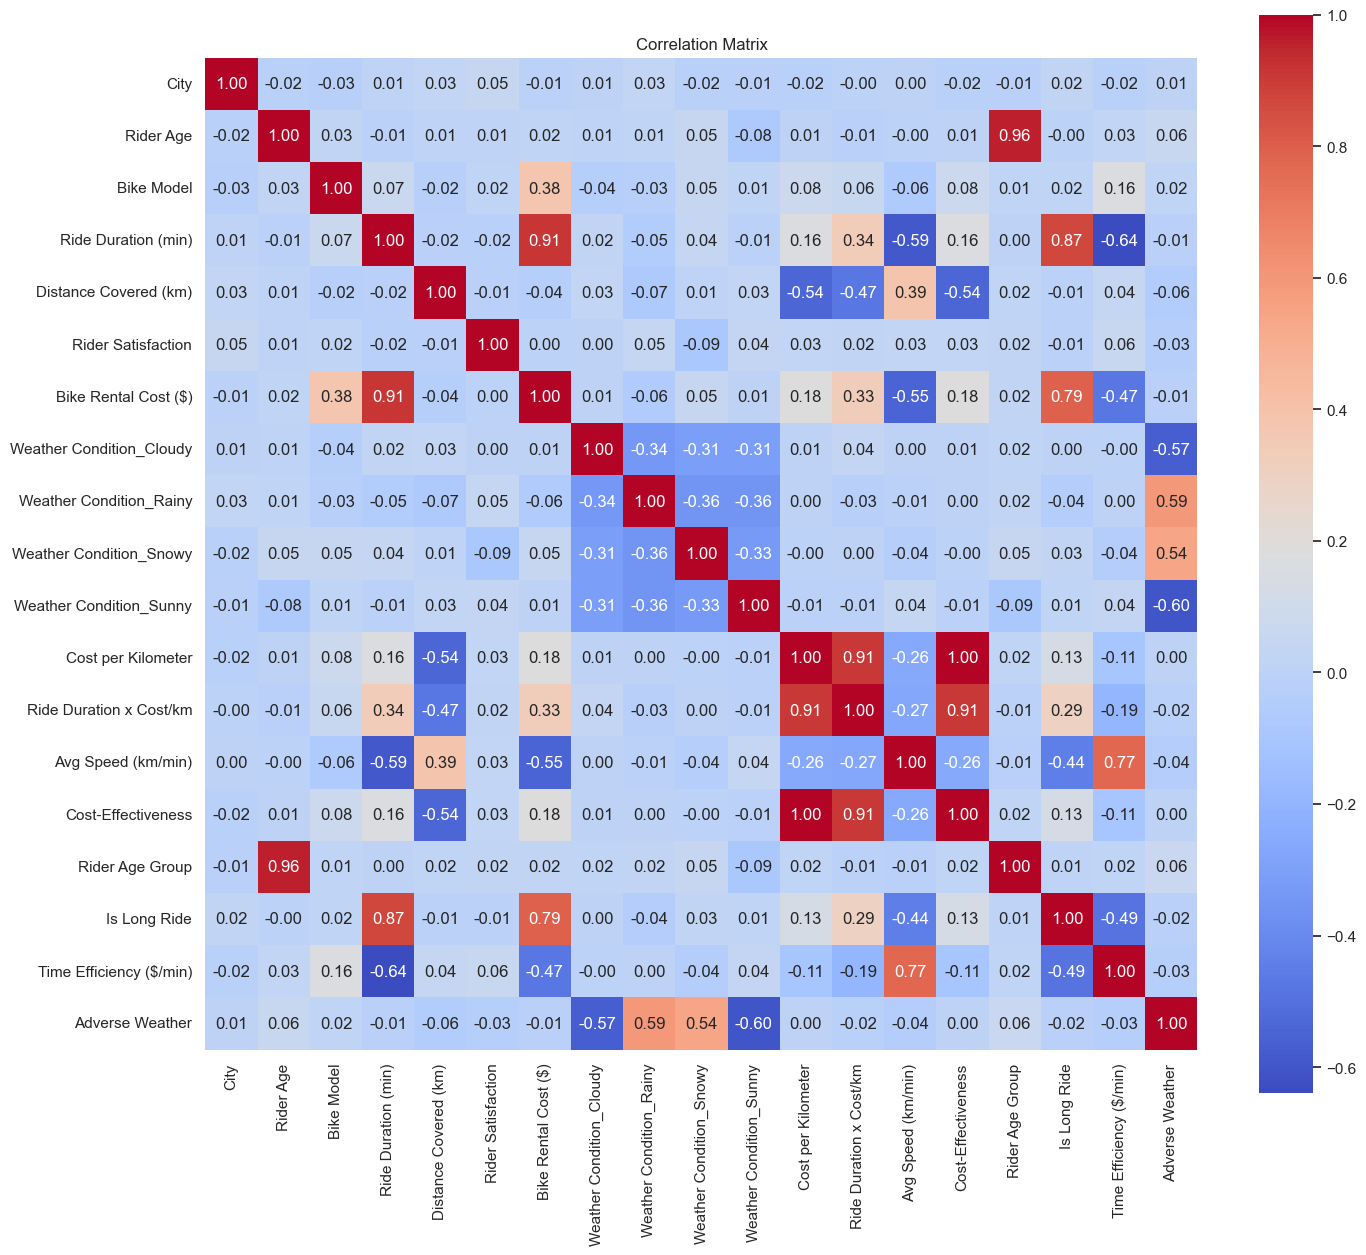

In [551]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix")
plt.show()

After analysing the heatmap, the chosen strategy was to keep all the new features, even though there is no correlation with rider satisfaction, some have a good correlation with other variables and this can impact the performance of the algorithm with other variables that will be tested.

## Scaling

Goal: Normalize continuous variables


As shown below, the data does not follow a normal distribution. Therefore, the chosen standardization method was Normalization (Min-Max Scaling), since Z-score Scaling is typically used for algorithms that assume normally distributed data.


**Shapiro-Wilk Test**

 If the p-value is greater than 0.05, you fail to reject the null hypothesis, suggesting that the data is normally distributed.


In [552]:
from scipy.stats import shapiro

numeric_columns = [
    'Rider Age', 
    'Ride Duration (min)', 
    'Distance Covered (km)', 
    'Bike Rental Cost ($)', 
    'Cost per Kilometer',
    'Ride Duration x Cost/km', 
    'Avg Speed (km/min)', 
    'Cost-Effectiveness', 
    'Time Efficiency ($/min)'
]
for col in numeric_columns:
    stat, p_value = shapiro(df[col].dropna())
    
    print(f"Shapiro-Wilk Test for {col}: p-value = {p_value}")
    
    if p_value > 0.05:
        print(f"The null hypothesis of normality cannot be rejected for {col}.")
    else:
        print(f"The null hypothesis of normality is rejected for {col}.")
    print("-" * 50)

Shapiro-Wilk Test for Rider Age: p-value = 2.1592812062193337e-15
The null hypothesis of normality is rejected for Rider Age.
--------------------------------------------------
Shapiro-Wilk Test for Ride Duration (min): p-value = 1.0448593509019568e-16
The null hypothesis of normality is rejected for Ride Duration (min).
--------------------------------------------------
Shapiro-Wilk Test for Distance Covered (km): p-value = 1.6185766912133833e-14
The null hypothesis of normality is rejected for Distance Covered (km).
--------------------------------------------------
Shapiro-Wilk Test for Bike Rental Cost ($): p-value = 9.134077765950899e-10
The null hypothesis of normality is rejected for Bike Rental Cost ($).
--------------------------------------------------
Shapiro-Wilk Test for Cost per Kilometer: p-value = 1.480348168856726e-45
The null hypothesis of normality is rejected for Cost per Kilometer.
--------------------------------------------------
Shapiro-Wilk Test for Ride Durati

**Q-Q Plot (Quantile-Quantile Plot)**

If the points on the Q-Q graph form a straight line, then the data probably follows a normal distribution. Does not apply to our case.

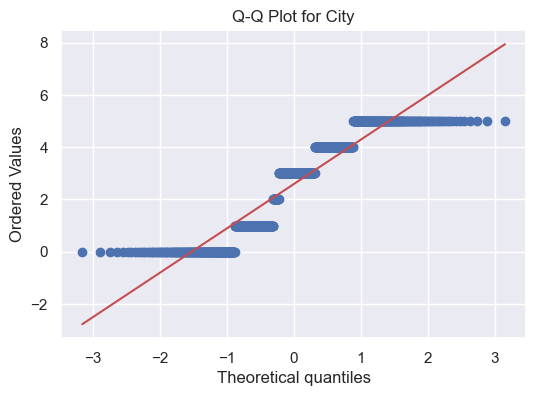

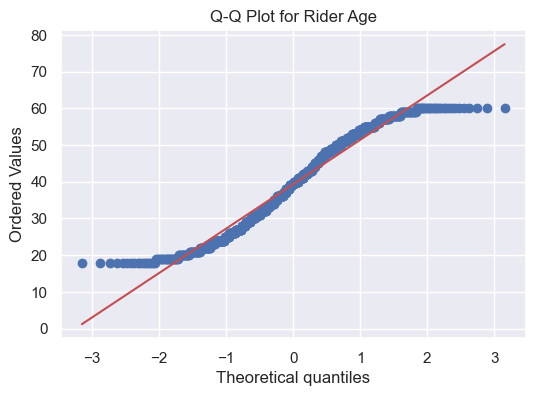

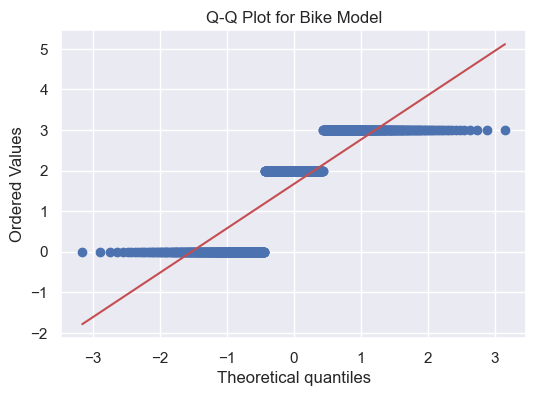

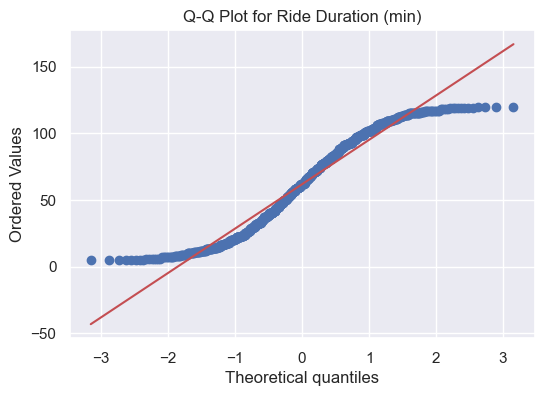

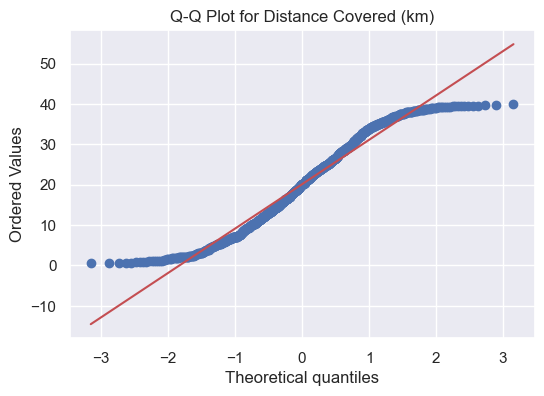

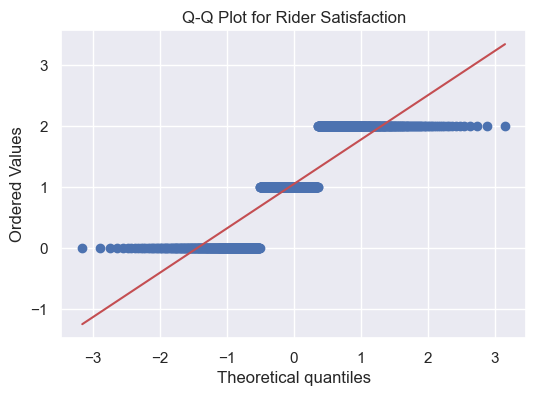

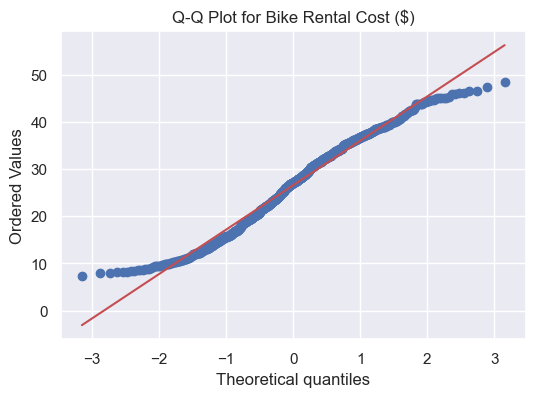

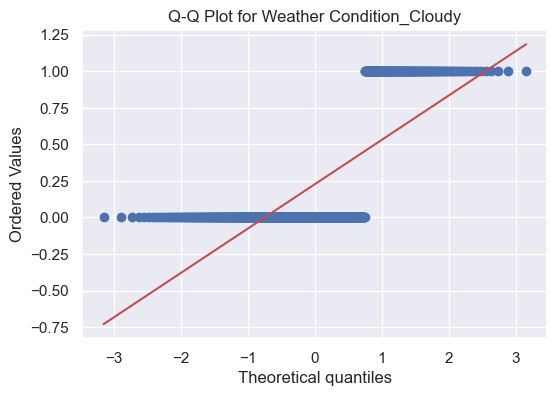

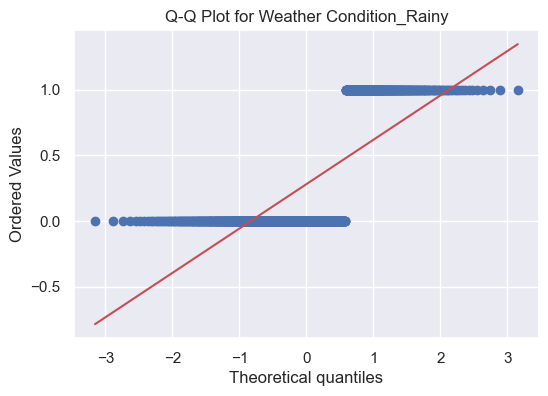

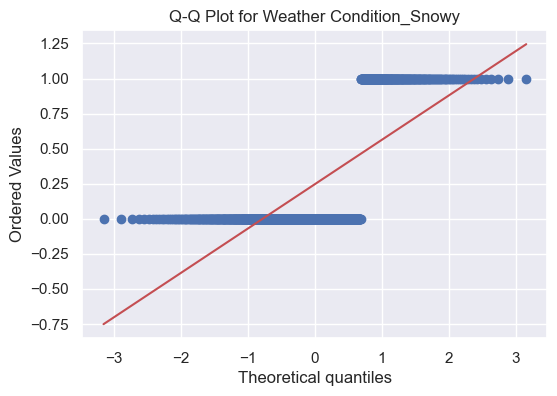

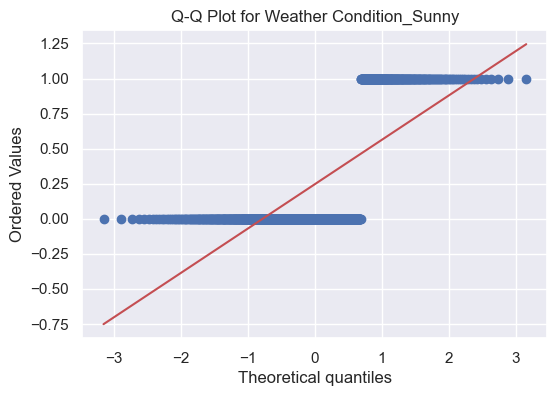

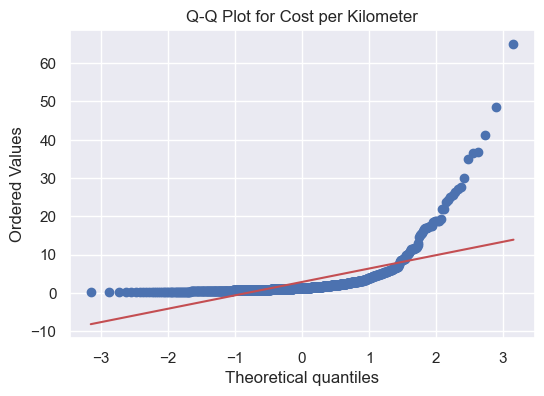

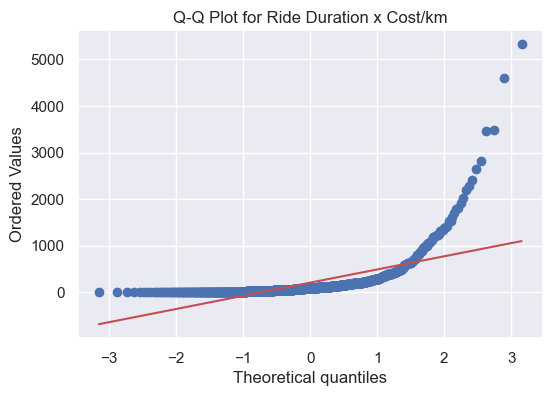

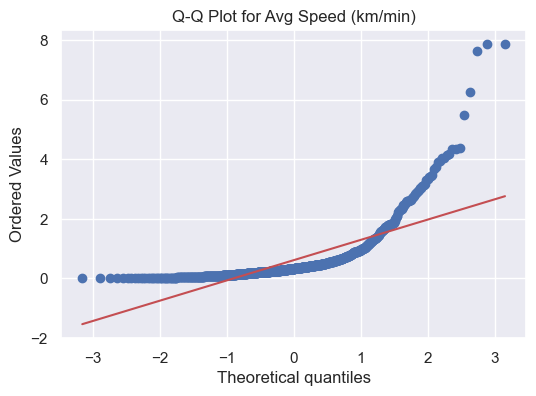

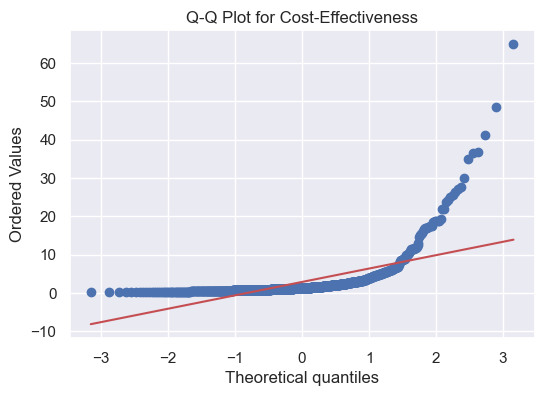

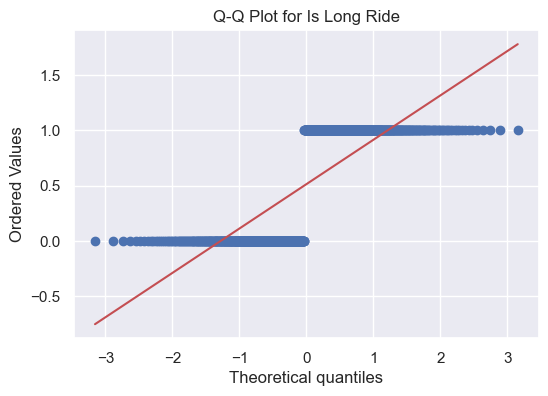

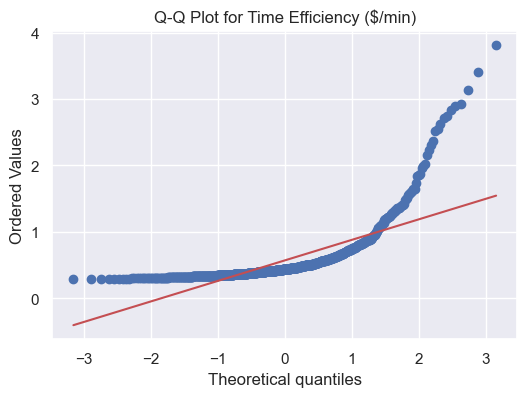

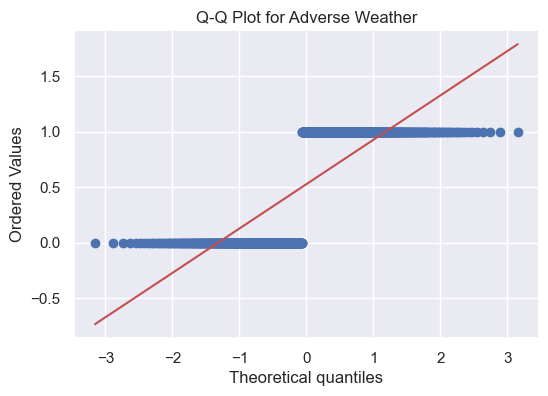

In [553]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.show()

First let's isolate the independent variables X and dependent Y

In [554]:
X = df.loc[:, df.columns != 'Rider Satisfaction']

In [555]:
y = df['Rider Satisfaction']

**Normalization (Min-Max Scaling)**

In [556]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

df_scaled.head()

,City,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Cost per Kilometer,Ride Duration x Cost/km,Avg Speed (km/min),Cost-Effectiveness,Rider Age Group,Is Long Ride,Time Efficiency ($/min),Adverse Weather
0,0.0,0.833333,0.000000,0.495652,0.044207,0.372716,0.0,1.0,0.0,0.0,0.152208,0.116839,0.003829,0.152208,1.000000,1.0,0.020582,1.0
1,1.0,0.500000,0.000000,0.000000,0.537602,0.013155,1.0,0.0,0.0,0.0,0.002507,0.000084,0.551044,0.002507,0.666667,0.0,0.364302,0.0
2,0.0,0.595238,1.000000,0.878261,0.708587,0.781242,0.0,0.0,0.0,1.0,0.018322,0.027357,0.033322,0.018322,0.666667,1.0,0.022486,0.0
3,1.0,0.142857,0.000000,0.991304,0.130843,0.738124,1.0,0.0,0.0,0.0,0.099561,0.148306,0.005264,0.099561,0.000000,1.0,0.006713,0.0
4,0.8,0.142857,0.666667,0.052174,0.641006,0.141048,0.0,0.0,0.0,1.0,0.004770,0.000796,0.297154,0.004770,0.000000,0.0,0.255906,0.0


## 5. Dimensionality Reduction: LDA vs PCA

**Linear Discriminant Analysis - LDA**

LDA is a `supervised` dimensionality reduction technique.  Mainly used for `classification`, not regression.


Y represents the dependent variable (also called target, label or response variable).

In [557]:
y=df["Rider Satisfaction"]

X represents the independent variables (also called features, attributes or predictor variables).

In [558]:
X = X_scaled

In [559]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)
X_lda.shape

(865, 2)

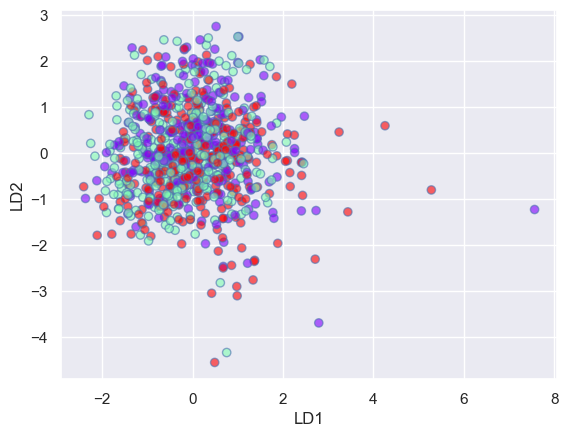

In [560]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:, 0], 
    X_lda[:, 1],  
    c=y,           
    cmap='rainbow', 
    alpha=0.6,      
    edgecolors='b'  
)  
plt.show()    

The Rider Satisfaction variable has three categories: 'Low' (0), 'Medium' (1), and 'High' (2). As we observed, LDA was able to separate the groups to some extent, although not perfectly. Now, let's compare the results with PCA to see which one performs better.

**Principal component analysis - PCA**

PCA is an `unsupervised` dimensionality reduction technique. It is widely used in both classification and regression problems.

In order to have comparison parameters with LDA, the chosen strategy was to consider 2 components.

Variance explained by each component (%): [24.87616772 18.4744642 ]
Cumulative variance explained (%): 43.35063192289681


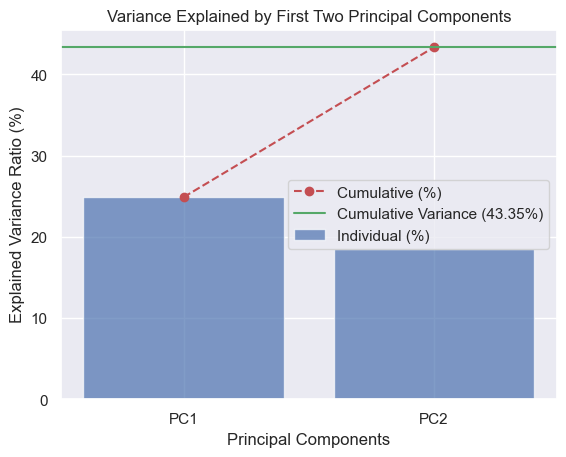

In [561]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_ * 100  
cumulative_variance = np.cumsum(explained_variance)

print(f"Variance explained by each component (%): {explained_variance}")
print(f"Cumulative variance explained (%): {cumulative_variance[-1]}")

plt.bar(['PC1', 'PC2'], explained_variance, alpha=0.7, color='b', label='Individual (%)')
plt.plot(['PC1', 'PC2'], cumulative_variance, marker='o', linestyle='--', color='r', label='Cumulative (%)')
plt.axhline(y=cumulative_variance[-1], color='g', linestyle='-', label=f'Cumulative Variance ({cumulative_variance[-1]:.2f}%)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio (%)')
plt.title('Variance Explained by First Two Principal Components')
plt.legend()
plt.show()

PCA should not use Y, as it analyzes the correlation and covariance between the independent variables (X). Therefore, isolating Y is mandatory to ensure that the main components only reflect the input characteristics. For this analysis we will only consider the variable X.

In [562]:
pca = PCA(2)  
X_pca = pca.fit_transform(X)  
print(X.shape)
print(X_pca.shape)


(865, 18)
(865, 2)


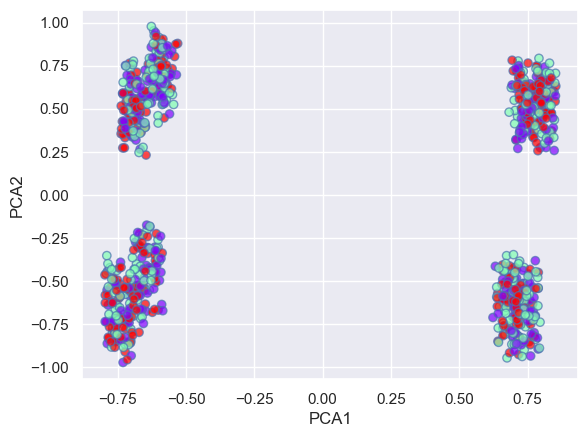

In [563]:
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.scatter(
    X_pca[:, 0],  
    X_pca[:, 1],  
    c=y,           
    cmap='rainbow', 
    alpha=0.7,      
    edgecolors='b'  
)
plt.show()      

Since PCA doesn’t use class labels (as it’s unsupervised), it doesn’t “know” what we are trying to predict. It analyses the maximum variance and creates regions, organising the data based on total variation. In our case, it ended up creating more groups than the target variable categories because PCA is based on total variance, whereas LDA focuses on class discrimination. Now, let's proceed with implementing machine learning to analyse which method performs better.



# Machine Learning - Supervised Classification Technique

# 1. Selection of Machine Learning Approach

The target variable for this analysis is **Rider Satisfaction**, a categorical variable with three possible values: 'Low', 'Medium', and 'High', making it suitable for **classification** tasks. This is supervised learning, when the algorithm learns from labeled data, where X represents the features and Y is the target variable, **Rider Satisfaction**. Unsupervised learning, which works with unlabeled data to find patterns, does not apply here.

The chosen strategy will be the algorithm below for comparative evaluation of classification algorithms using cross validation.

In [564]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('XGBoost', xgb.XGBClassifier()))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean():.6f} ({cv_results.std():.6f})')

LR: 0.345300 (0.056120)
KNN: 0.352629 (0.065559)
CART: 0.319296 (0.056125)
NB: 0.355445 (0.042635)
SVM: 0.355487 (0.027315)
Random Forest: 0.325031 (0.037293)
Gradient Boosting: 0.335135 (0.038568)
XGBoost: 0.345238 (0.050071)


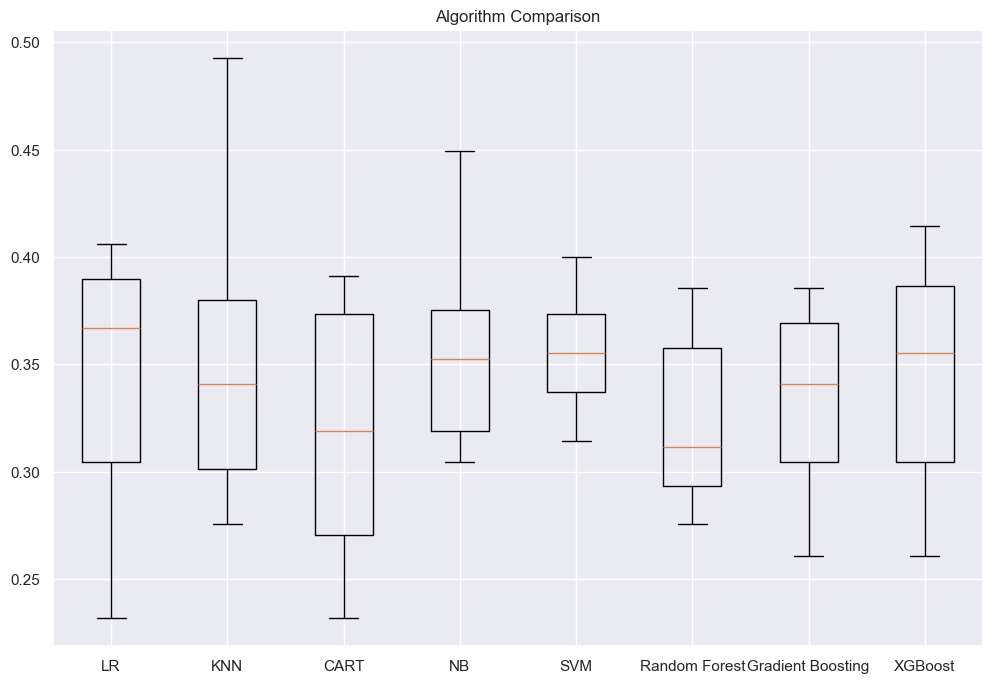

In [565]:
plt.figure(figsize=(12, 8))

plt.boxplot(results, labels=names)

plt.title('Algorithm Comparison')

plt.show()

The chosen model was Logistic Regression with 34.53% accuracy.

## Logistic Regression

Logistic Regression used for classification, predicting the probability of class membership based on input features.

In [566]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

**PCA data**

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=10)

In [568]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 31.7919%
Test Confusion Matrix:
[[ 0  1 59]
 [ 0  1 55]
 [ 0  3 54]]


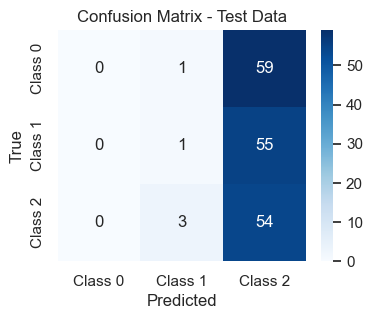

In [569]:
pred = model.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy:.4%}')  

test_conf_matrix = confusion_matrix(y_test, pred)
print('Test Confusion Matrix:')
print(test_conf_matrix)

plt.figure(figsize=(4, 3))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Train Accuracy: 35.6936%
Train Confusion Matrix:
[[  0   7 198]
 [  0   7 227]
 [  0  13 240]]


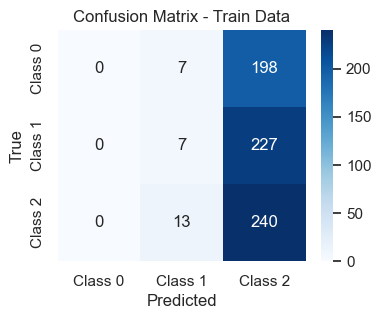

In [570]:
train_pred = model.predict(X_train)

train_accuracy = accuracy_score(y_train, train_pred)
print(f'Train Accuracy: {train_accuracy:.4%}') 

train_conf_matrix = confusion_matrix(y_train, train_pred)
print('Train Confusion Matrix:')
print(train_conf_matrix)

plt.figure(figsize=(4, 3))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Cross Validation

In [571]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, shuffle=True, random_state=10)

model = LogisticRegression()

result = cross_val_score(model, X_pca, y, cv=kfold)

print("Cross Validation Accuracy: %.2f%%" % (result.mean() * 100.0))

Cross Validation Accuracy: 31.78%


**LDA data**

In [572]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=10)

In [573]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 42.7746%
Test Confusion Matrix:
[[11 24 25]
 [ 6 30 20]
 [ 4 20 33]]


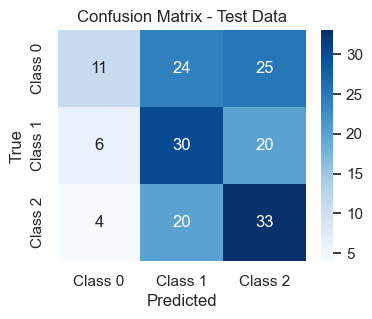

In [574]:
pred = model.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy:.4%}')  

test_conf_matrix = confusion_matrix(y_test, pred)
print('Test Confusion Matrix:')
print(test_conf_matrix)

plt.figure(figsize=(4, 3))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Train Accuracy: 40.0289%
Train Confusion Matrix:
[[ 33  69 103]
 [ 33 101 100]
 [ 29  81 143]]


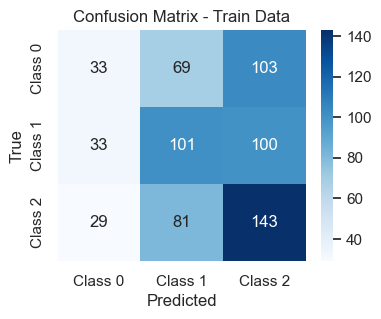

In [575]:
train_pred = model.predict(X_train)

train_accuracy = accuracy_score(y_train, train_pred)
print(f'Train Accuracy: {train_accuracy:.4%}') 

train_conf_matrix = confusion_matrix(y_train, train_pred)
print('Train Confusion Matrix:')
print(train_conf_matrix)

plt.figure(figsize=(4, 3))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Cross Validation

In [576]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, shuffle=True, random_state=10)

model = LogisticRegression()

result = cross_val_score(model, X_lda, y, cv=kfold)

print("Cross Validation Accuracy: %.2f%%" % (result.mean() * 100.0))

Cross Validation Accuracy: 40.24%


# 3. Hyperparameter Tuning

Hyperparameters are the settings or configurations of a machine learning model that are set before the model is trained. These can affect the model’s performance and include settings like the learning rate or regularization strength.

GridSearchCV is a method used to find the best combination of hyperparameters for a given model. It tries every possible combination of the specified hyperparameters, trains the model with each combination, and then selects the one that gives the best performance.
GridSearchCV helps to automatically search for the best model configuration to improve accuracy.

In [577]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

lr = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],        
    'solver': ['liblinear', 'saga'], 

}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=10)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-validation Accuracy: 0.3656031696382025
Test Accuracy: 0.3295


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# 4. Comparison of Machine Learning Outcomes

### The hyperparameter
The hyperparameter adjustments did not have a significant impact, which can be attributed to the fact that Logistic Regression may have struggled to capture the complex relationships within the data. Another important factor that might have influenced the results is the **low correlation between the target variable, Rider Satisfaction, and the other features**.

Without hyperparameter tuning (random_state = 10 test_size=0.2)
- LogisticRegression PCA: Test: 31.7919% / Train: 35.6936% CROSS VALIDATION: 33.63%
- **LogisticRegression LDA: Test: 42.7746% / Train: 40.0289% CROSS VALIDATION: 40.11%**

With hyperparameter tuning (random_state = 10 test_size=0.2)
- LogisticRegression PCA: Test: 35.6936%% / Train: 36.8497% CROSS VALIDATION: 33.63%
- LogisticRegression LDA: Test: 42.1965% / Train: 39.8844% CROSS VALIDATION: 40.11%



### Training splits (10%, 20%, 30%)

Helps evaluate how well a model generalizes to unseen data by testing its performance with various training set sizes.

With hyperparameter tuning (C=1, penalty='l2', solver='liblinear', random_state = 10)

- 1.	10% training data / 90% testing data.
- LogisticRegression PCA: Test: 32.1839% / Train: 36.2468% CROSS VALIDATION: 33.63%
- LogisticRegression LDA: Test: 45.9770% / Train: 39.5887% CROSS VALIDATION: 40.11%

- 2.	20% training data / 80% testing data.
- LogisticRegression PCA: Test: 35.6936%% / Train: 36.8497% CROSS VALIDATION: 33.63%
- **LogisticRegression LDA: Test: 42.1965% / Train: 39.8844% CROSS VALIDATION: 40.11%**

- 3.	30% training data / 70% testing data.
- LogisticRegression PCA: Test: 31.9231% / Train: 34.3802% CROSS VALIDATION: 33.63%
- LogisticRegression LDA: Test: 40.3846% / Train: 40.1653%% CROSS VALIDATION: 40.11%

### Cross-Validation (10, 15, 20, 30)

Cross-validation is a technique used to assess the performance of a model by splitting the data into multiple subsets, or “folds.” The process involves training the model on some of the folds and testing it on the remaining fold(s), then repeating this for each fold. Here’s a quick explanation for different numbers of folds:

(shuffle=True, random_state=10)

- LogisticRegression PCA 10-CROSS VALIDATION: 31.78%
- **LogisticRegression LDA 10-CROSS VALIDATION: 40.24%**


- LogisticRegression PCA 15-CROSS VALIDATION: 33.63%
- LogisticRegression LDA 15-CROSS VALIDATION: 40.11%


- LogisticRegression PCA 20-CROSS VALIDATION: 31.67%
- LogisticRegression LDA 20-CROSS VALIDATION: 40.23%


- LogisticRegression PDA 30-CROSS VALIDATION: 31.91%
- LogisticRegression LDA 30-CROSS VALIDATION: 40.14%

The best scenario was LogisticRegression LDA: Test: 42.1965% / Train: 39.8844% CROSS VALIDATION 10: 40.11% Without hyperparameter tuning (random_state = 10 test_size=0.2)

LDA proved to be more efficient in this case because, even though it didn’t achieve outstanding performance in class separation, it still outperformed PCA. This is because **PCA is based on total variance** and does not consider the labels, making it an unsupervised technique, while **LDA focuses on maximizing class separation**, which aligns better with the objective of this task.

Now, we will test the algorithm using a different categorical variable, **Bike Model**, which shows a higher correlation with other variables and might result in better accuracy.

# 5. Evaluating Alternative Features: Testing with Bike Model

In [578]:
df.head()

,City,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Cost per Kilometer,Ride Duration x Cost/km,Avg Speed (km/min),Cost-Effectiveness,Rider Age Group,Is Long Ride,Time Efficiency ($/min),Adverse Weather
0,0,53.0,0,62.0,2.25,2,22.63,0,1,0,0,10.057778,623.582222,0.036290,10.057778,3,1,0.365000,1
1,5,39.0,0,5.0,21.67,1,7.87,1,0,0,0,0.363175,1.815874,4.334000,0.363175,2,0,1.574000,0
2,0,43.0,3,106.0,28.40,2,39.40,0,0,0,1,1.387324,147.056338,0.267925,1.387324,2,1,0.371698,0
3,5,24.0,0,119.0,5.66,0,37.63,1,0,0,0,6.648410,791.160777,0.047563,6.648410,0,1,0.316218,0
4,4,24.0,2,11.0,25.74,0,13.12,0,0,0,1,0.509713,5.606838,2.340000,0.509713,0,0,1.192727,0


First let's isolate the independent variables X and dependent Y

In [579]:
X = df.loc[:, df.columns != 'Bike Model']
y = df['Bike Model']

Then normalize data with **Normalization (Min-Max Scaling)**

In [580]:
scaler = MinMaxScaler()

X_scaled2 = scaler.fit_transform(X)

df_scaled2 = pd.DataFrame(X_scaled2, columns=X.columns)

df_scaled2.head()

,City,Rider Age,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Cost per Kilometer,Ride Duration x Cost/km,Avg Speed (km/min),Cost-Effectiveness,Rider Age Group,Is Long Ride,Time Efficiency ($/min),Adverse Weather
0,0.0,0.833333,0.495652,0.044207,1.0,0.372716,0.0,1.0,0.0,0.0,0.152208,0.116839,0.003829,0.152208,1.000000,1.0,0.020582,1.0
1,1.0,0.500000,0.000000,0.537602,0.5,0.013155,1.0,0.0,0.0,0.0,0.002507,0.000084,0.551044,0.002507,0.666667,0.0,0.364302,0.0
2,0.0,0.595238,0.878261,0.708587,1.0,0.781242,0.0,0.0,0.0,1.0,0.018322,0.027357,0.033322,0.018322,0.666667,1.0,0.022486,0.0
3,1.0,0.142857,0.991304,0.130843,0.0,0.738124,1.0,0.0,0.0,0.0,0.099561,0.148306,0.005264,0.099561,0.000000,1.0,0.006713,0.0
4,0.8,0.142857,0.052174,0.641006,0.0,0.141048,0.0,0.0,0.0,1.0,0.004770,0.000796,0.297154,0.004770,0.000000,0.0,0.255906,0.0


Apply LDA, the best approach being as shown above

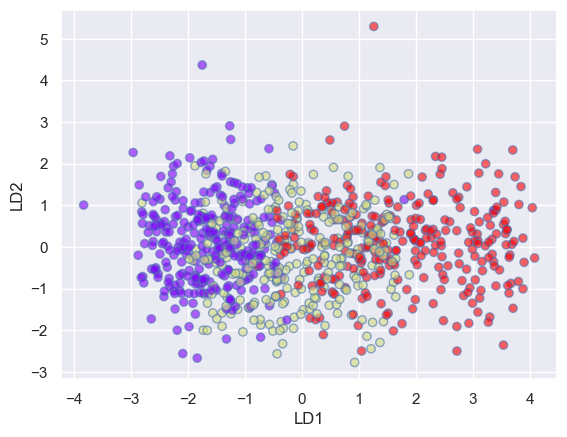

In [581]:
y=df['Bike Model']
X = X_scaled2

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)
X_lda.shape

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:, 0], 
    X_lda[:, 1],  
    c=y,           
    cmap='rainbow', 
    alpha=0.6,      
    edgecolors='b'  
)  
plt.show()    

Now use Logistic Regression

In [582]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=10)

In [583]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 71.0983%
Test Confusion Matrix:
[[52  9  0]
 [12 33 10]
 [ 0 19 38]]


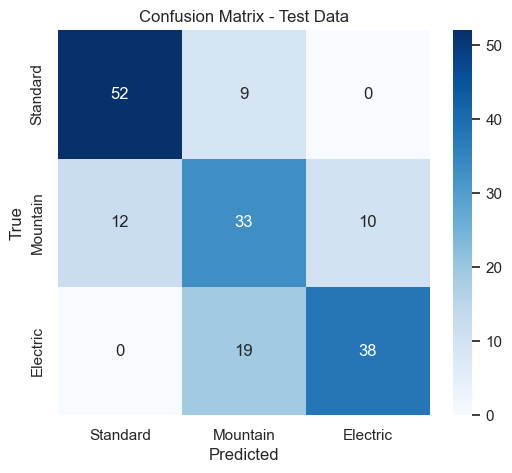

In [584]:
pred = model.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy:.4%}')  

test_conf_matrix = confusion_matrix(y_test, pred)
print('Test Confusion Matrix:')
print(test_conf_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(
    test_conf_matrix, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=['Standard', 'Mountain', 'Electric'], 
    yticklabels=['Standard', 'Mountain', 'Electric']
)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [585]:
model = model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Train Accuracy: 71.8208%
Train Confusion Matrix:
[[186  38   2]
 [ 51 132  54]
 [  0  50 179]]


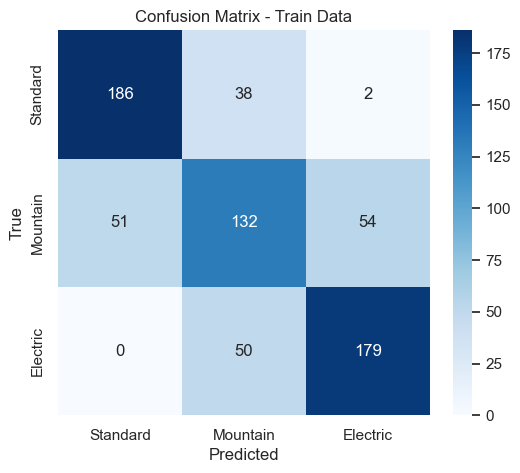

In [586]:
train_pred = model.predict(X_train)

train_accuracy = accuracy_score(y_train, train_pred)
print(f'Train Accuracy: {train_accuracy:.4%}') 

train_conf_matrix = confusion_matrix(y_train, train_pred)
print('Train Confusion Matrix:')
print(train_conf_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(
    train_conf_matrix, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=['Standard', 'Mountain', 'Electric'], 
    yticklabels=['Standard', 'Mountain', 'Electric']
)
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Cross Validation

In [587]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, shuffle=True, random_state=10)

model = LogisticRegression()

result = cross_val_score(model, X_lda, y, cv=kfold)

print("Cross Validation Accuracy: %.2f%%" % (result.mean() * 100.0))

Cross Validation Accuracy: 70.65%


## Results 

Without hyperparameter tuning (random_state = 10 test_size=0.2)

LogisticRegression LDA: Test: 71.0983% / Train: 71.8208% CROSS VALIDATION: 70.65%.

As expected, the Bike Model variable showed better performance when used with LDA and Logistic Regression. This improvement can be attributed to the significant correlation between Bike Model and other key features. These correlations provide valuable information that allows the model to better differentiate between the categories and make more accurate predictions.

# Machine Learning - Supervised Regression Technique

The target variable for this analysis is **Bike Rental Cost**, a continuous numerical variable representing the total cost of the bike rental in USD. The value is influenced by factors such as ride duration, bike model, and additional services. This makes it suitable for regression tasks, where the objective is to predict a continuous output based on input features. This is a supervised learning scenario, where the algorithm learns from labeled data, with **X** representing the features and **Y** being the target variable, **Bike Rental Cost ($)**. Unlike unsupervised learning, which identifies patterns in unlabeled data, supervised learning focuses on making accurate predictions based on the provided labels.



# 6. Selection of Machine Learning Approach

The chosen strategy was to consider only the variables that have a certain correlation with **Bike Rental Cost ($)**, within the range of ±0.3.

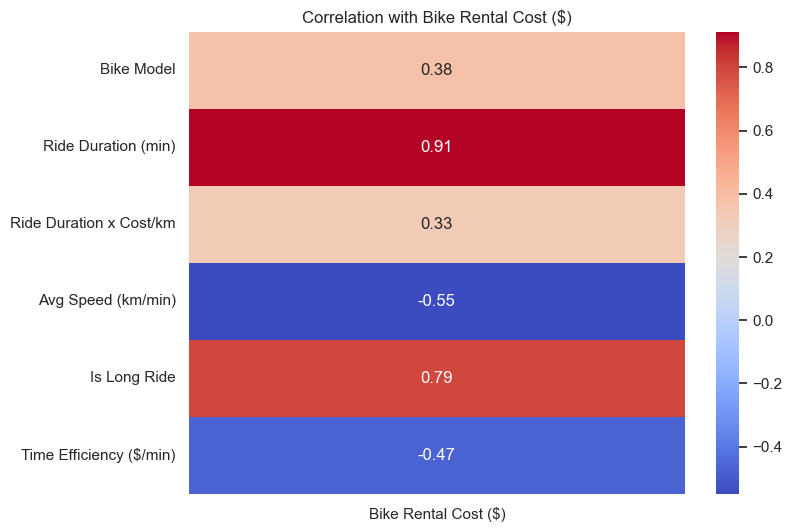

In [588]:
correlation_matrix = df.corr()

target = 'Bike Rental Cost ($)'
correlation_threshold = 0.3

filtered_corr = correlation_matrix[[target]].copy()
filtered_corr = filtered_corr[(filtered_corr[target].abs() >= correlation_threshold) & (filtered_corr.index != target)]

plt.figure(figsize=(8, 6))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title(f"Correlation with {target}")
plt.show()

In [589]:
X = df[['Bike Model', 'Ride Duration (min)', 'Ride Duration x Cost/km', 'Avg Speed (km/min)', 'Is Long Ride', 'Time Efficiency ($/min)']]
y = df['Bike Rental Cost ($)'] 

**PCA**

Since the variable Bike Rental Cost does not have distinct categories and is continuous, I will apply PCA

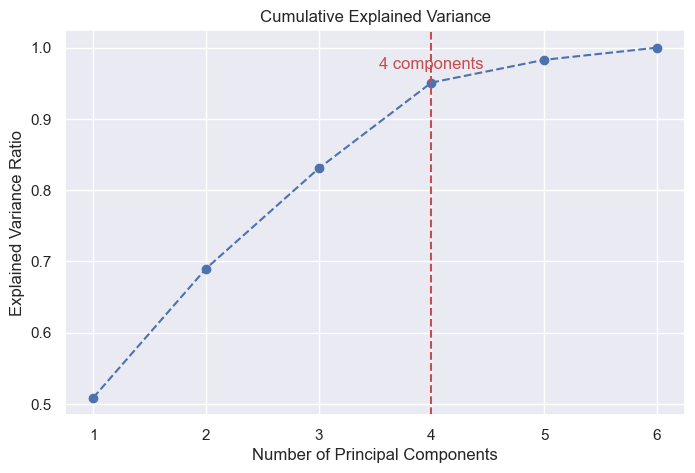

Number of components explaining at least 95% of the variance: 4


In [590]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


pca = PCA()
X_pca = pca.fit_transform(X)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

n_components_95 = np.argmax(explained_variance_ratio >= 0.95) + 1

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_variance_ratio) + 1), 
    explained_variance_ratio, 
    marker='o', 
    linestyle='--'
)

plt.axvline(x=n_components_95, color='r', linestyle='--')

plt.text(
    n_components_95, 
    explained_variance_ratio[n_components_95-1] + 0.02, 
    f'{n_components_95} components', 
    color='r', 
    ha='center'
)

plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

print(f"Number of components explaining at least 95% of the variance: {n_components_95}")

In [591]:
pca = PCA(4)  
X_pca = pca.fit_transform(X)  
print(X.shape)
print(X_pca.shape)


(865, 6)
(865, 4)


In [592]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(random_state=0),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=0),
    "Neural Network": MLPRegressor(random_state=0, max_iter=500)
}

results = []

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        "Model": name,
        "R² (Test)": r2,
        "MAE (Test)": mae,
        "R² (CV Mean)": cv_scores.mean()
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R² (Test)", ascending=False))


                      Model  R² (Test)  MAE (Test)  R² (CV Mean)
5                   XGBoost   0.954862    1.537037      0.941913
2             Random Forest   0.945044    1.684853      0.942566
3       K-Nearest Neighbors   0.929092    1.964246      0.922710
1             Decision Tree   0.923878    2.046870      0.890639
0         Linear Regression   0.896049    2.465050      0.892020
6            Neural Network   0.894245    2.422515      0.883866
4  Support Vector Regressor   0.867402    2.510987      0.876249


# XGBoost

XGBoost (Extreme Gradient Boosting) is a **supervised learning algorithm** that can be applied to both **regression** and **classification** tasks. In regression, it predicts continuous values, while in classification, it assigns data points to specific categories. 

When used in the context of predicting **Bike Rental Cost ($)**, XGBoost operates as a **supervised regression model**, learning from a labelled dataset to accurately forecast continuous outcomes based on the input features.

In [593]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 10)

In [594]:
xgboost = XGBRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1, random_state = 10)

xgboost.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=10, ...)

In [595]:
xgboost.score(x_train, y_train)
print("The model explains approximately %.2f%% of the variance in the training data." % (xgboost.score(x_train, y_train) * 100.0))

The model explains approximately 96.43% of the variance in the training data.


In [596]:
xgboost.score(x_test, y_test)
print("The model explains approximately %.2f%% of the variance in the test data." % (xgboost.score(x_test, y_test) * 100.0))

The model explains approximately 93.68% of the variance in the test data.


**Cross Validation**

In [597]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

kfold = KFold(n_splits = 15, shuffle=True, random_state = 10)

model = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=1, objective = "reg:squarederror")
result = cross_val_score(model, X_pca, y, cv = kfold)

print("Cross Validation: %.2f%%" % (result.mean() * 100.0))

Cross Validation: 93.36%


# 8.Hyperparameter Tuning

The goal of hyperparameter tuning is to find a combination of hyperparameters that leads to the best model performance in terms of accuracy, generalization, and error minimization

In [286]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgboost = XGBRegressor(objective="reg:squarederror", random_state=0)

param_grid = {
    'n_estimators': [50, 100, 150, 200],  
    'max_depth': [3, 5, 7, 9],             
    'learning_rate': [0.01, 0.05, 0.1],    
    'subsample': [0.8, 0.9, 1.0],          
    'colsample_bytree': [0.8, 0.9, 1.0]   
}

grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(x_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best validation score (R²):", grid_search.best_score_)

best_xgboost = grid_search.best_estimator_

test_score = best_xgboost.score(x_test, y_test)
print("R² on the test set:", test_score)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best validation score (R²): 0.9478480387626197
R² on the test set: 0.9605267028368223
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, 

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimat

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimat

Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Best validation score (R²): 0.8802068993147649

R² on the test set: 0.8248013771752959

# 9. Comparison of Machine Learning Outcomes

In this case, the hyperparameters were important because, without hyperparameter tuning, the model showed clear signs of overfitting, as the training accuracy was very high, while the test and cross-validation performance were much lower. However, with hyperparameter tuning, the model achieved a lower training accuracy (96.43%) in exchange for a more balanced and reliable performance on unseen data, demonstrating that the tuning helped reduce overfitting by balancing the learning capacity with the generalization ability.
    

With **no hyperparameter** tuning (random_state = 10 test_size=0.2)

XGBoost PCA: Test: 95.43% / Train: 99.98% CROSS VALIDATION: 93.36%

With hyperparameter tuning (random_state = 10 test_size=0.2)

XGBoost PCA: Test: 93.68% / Train: 96.43% CROSS VALIDATION: 93.36%


# Conclusion

The analysis of the variables **Rider Satisfaction** and **Bike Rental Cost** provided valuable insights for predicting and understanding customer behavior, as well as optimizing operational costs.

The **Rider Satisfaction** variable was the primary target for the classification analysis, aiming to predict customer satisfaction levels (Low, Medium, and High). Supervised learning techniques, such as Linear Discriminant Analysis (LDA) and Logistic Regression, proved effective, with LDA being particularly superior to PCA in this scenario. LDA was able to maximize class separation more efficiently, while PCA, an unsupervised technique, did not account for class labels and therefore performed worse. Additionally, the exclusion of the **Bike Model Manual** class was necessary due to its limited impact on the model due to the low amount of data. The **LDA model**, without complex hyperparameter adjustments, provided the best results in terms of consistency and robustness in classifying satisfaction levels.

The exclusion of the **Bike Model Manual** class was necessary due to the limited amount of available data, which could affect the accuracy of the model's predictions. Based on the data, it may be worth considering removing this model from the bike fleet, especially if its demand and performance are lower than other models. However, before making this decision, it is important to verify that the data is correct and that the model is indeed available on the streets but has not been rented. If this is confirmed, removing this model could help reduce operational costs.

On the other hand, the **Bike Rental Cost** analysis was a classic regression task, aiming to predict the bike rental cost based on various variables. The **XGBoost model** stood out as the best for this task, after careful hyperparameter tuning. Initially, the model showed signs of overfitting, with high training accuracy but poorer performance on tests. However, by optimizing the hyperparameters, the model achieved a more balanced performance, with 96.43% accuracy in training, and better generalization ability for unseen data, helping to reduce overfitting. The PCA technique was also successfully applied, explaining 95% of the variance with 4 components, which contributed to improved model performance. When analysing the factors that most influence the bike rental cost, it was found that the variables **Bike Model**, **Ride Duration (min)**, **Ride Duration x Cost/km**, **Avg Speed (km/min)**, **Is Long Ride**, and **Time Efficiency ($/min)** showed strong correlation with the cost, making them essential for predicting **Bike Rental Cost**.

In terms of business impact, these analyses provided crucial information. For predicting **Rider Satisfaction**, the company can use supervised learning models to identify and improve the factors that most influence customer satisfaction. For predicting **Bike Rental Cost**, the **XGBoost model**, can help the company optimize its fleet and pricing, adjusting strategies according to the variables that most impact the cost.

These insights, based on machine learning techniques, offer a solid foundation for informed business decisions, aiming to improve both customer satisfaction and operational efficiency.

# References

**Hastie, T., Tibshirani, R. & Friedman, J.** (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction*. 2nd ed. New York: Springer.

**Iglewicz, B. & Hoaglin, D.C.** (1993). *How to Detect and Handle Outliers*. New York: Sage Publications.

**Kelleher, J.D. & Tierney, B.** (2018). *Data Science: An Introduction*. 1st ed. London: The MIT Press.

**Kuhn, M. & Johnson, K.** (2013). *Applied Predictive Modeling*. New York: Springer.

**Bishop, C.M.** (2006). *Pattern Recognition and Machine Learning*. New York: Springer.

**Scikit-learn.** (2024). *LogisticRegression — scikit-learn 1.5.0 documentation*. Available at: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html (Accessed: 27 November 2024).

**XGBoost Developers, 2024.** *XGBoost Documentation*. [online] Available at: <https://xgboost.readthedocs.io/en/stable/> [Accessed 28 November 2024].
